In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import csv
import seaborn as sb
import re

In [76]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn import metrics


In [77]:
# read files
True_news = pd.read_csv('/content/True.csv')
Fake_news = pd.read_csv('/content/Fake.csv')

In [78]:
# create label that take value true at 0

True_news['label'] = 0

# create label that take value false at 1

Fake_news['label'] = 1

In [79]:
# check the if data in files read probably and print first 10 records
True_news.head(10)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",0


In [80]:
# check the if data in files read probably and print first 10 records
Fake_news.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",1
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",1
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",1


In [81]:
# create to dataset that holds the feastures that we decide to train on it
dataset1 = True_news[['text','label']]
dataset2 = Fake_news[['text','label']]

In [82]:
# merge dataset1 and dataset2 in one new dataset
dataset = pd.concat([dataset1 , dataset2])

In [83]:
# dimensions of dataset contaning 44898 columns and 5 rows
dataset.shape

(44898, 2)

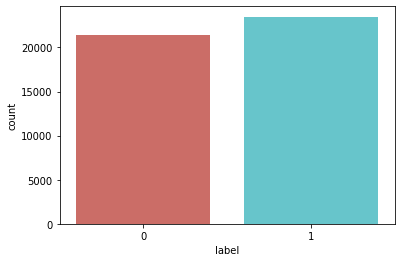

In [84]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(dataset)

In [85]:
dataset = dataset.dropna()
dataset = dataset.dropna(thresh=2)
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [86]:
# function help to check data quality 
def data_qualityCheck():
    print("Checking data qualitites..")
    # no null values
    dataset.isnull().sum()
    dataset.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites..
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB
check finished.


### Balanced or Unbalanced dataset

In [87]:
dataset['label'].value_counts()


1    23481
0    21417
Name: label, dtype: int64

In [88]:
dataset1.shape # true news

(21417, 2)

In [89]:
dataset2.shape # fake news

(23481, 2)

### Shuffle or Resample

In [90]:
dataset = dataset.sample(frac = 1)

In [91]:
dataset.head(20)

,text,label
7632,"After they were crushed in the 2012 election, ...",1
1304,The Morning Joe panel couldn t contain their l...,1
6184,Donald Trump s best efforts to smear Democrati...,1
13932,BEIJING/SHANGHAI (Reuters) - Chinese police ar...,0
19681,Obama awkwardly and kind of angrily tells the ...,1
9844,Sean Spicer was asked during a Washington Post...,1
12300,BRUSSELS (Reuters) - NATO chief Jens Stoltenbe...,0
1378,Last night Buzzfeed reported that a massive do...,1
12790,"BRUSSELS (Reuters) - Martin Selmayr, a top aid...",0
15537,ATHENS (Reuters) - Two gunmen fired a round of...,0


# **Cleaning Data Process**

In [92]:
# library that working with natural language data in Python
nltk.download('stopwords') # stopwords package that deal with english word in text classification 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [93]:
ps = WordNetLemmatizer()

In [94]:
# removing unwanted words in text to improve preformunce 
stopwords = stopwords.words('english')

In [95]:
def cleaning_data(row):
    
    # convert text to into lower case
    row = row.lower() 
    
    # this line of code only take words from text and remove number and special character using Regular expression
    row = re.sub('[^a-zA-Z]' , ' ' , row)
    
    # split the data and make token.
    token = row.split() 
    
    # lemmatize the word and remove stop words like a, an , the , is ,are ...
    news = [ps.lemmatize(word) for word in token if not word in stopwords]  
    
    # finaly join all the token with space
    cleanned_news = ' '.join(news) 
    
    # return cleanned data
    return cleanned_news 

In [96]:
dataset['text'] = dataset['text'].apply(lambda x : cleaning_data(x)) # The lambda keyword is used to define an anonymous function

In [97]:
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [98]:
vectorizer = TfidfVectorizer(max_features = 50000 , lowercase=False , ngram_range=(1,2))

In [99]:
dataset.shape

(44898, 2)

In [100]:
X = dataset.iloc[:35000,0] # rows 
y = dataset.iloc[:35000,1] # columns 

In [101]:
X.head()

7632     crushed election republican wrote post mortem ...
1304     morning joe panel contain laughter morning joe...
6184     donald trump best effort smear democratic fron...
13932    beijing shanghai reuters chinese police invest...
19681    obama awkwardly kind angrily tell audience cho...
Name: text, dtype: object

In [102]:
y.head()

7632     1
1304     1
6184     1
13932    0
19681    1
Name: label, dtype: int64

### **train Data**

In [103]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 0)

In [ ]:
# First fits the vectorizer to the training data by learning the vocabulary, and then transforms the training data into a numerical feature matrix.

vec_train_data = vectorizer.fit_transform(X_train).toarray()

In [ ]:
X_train.shape , X_test.shape

In [ ]:
vec_test_data = vectorizer.transform(X_test).toarray()

In [ ]:
vec_train_data.shape , vec_test_data.shape

In [ ]:
y_train.value_counts() # balanced partition

In [ ]:
y_test.value_counts() # balanced partition

In [ ]:
# returns a list of the names of the features (i.e., the vocabulary) learned by the vectorizer

X_training = pd.DataFrame(vec_train_data , columns=vectorizer.get_feature_names_out())
X_testing = pd.DataFrame(vec_test_data , columns= vectorizer.get_feature_names_out())